<a href="https://colab.research.google.com/github/SamiaNoor/ceri8211globalgeophysics/blob/master/samiaHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#SamiaHW4
#3(a)
import numpy as np
import math
M = np.array([5.08, 3.87, 3.02, 2.10, 1.18]) * math.pow(10,-5)
D = np.deg2rad(np.array([60.8, 62.1, 61.2, 62.2, 63.1]))
I = np.deg2rad(np.array([60.1, 59.8, 62.1, 61.6, 60.9]))
N = [0]*len(M)
E = [0]*len(M)
V = [0]*len(M)
for i in range(len(M)):
  N[i] = M[i]*math.cos(D[i])*math.cos(I[i])
  E[i] = M[i]*math.sin(D[i])*math.cos(I[i])
  V[i] = M[i]*math.sin(I[i])

print (N)
print (E)
print (V)

[1.235415658709796e-05, 9.109129768587117e-06, 6.807892598701284e-06, 4.658320315584679e-06, 2.5964130763452585e-06]
[2.210516042659585e-05, 1.7204152341128925e-05, 1.238351066525239e-05, 8.83529066060103e-06, 5.117809751691114e-06]
[4.403835484592862e-05, 3.344743483560838e-05, 2.6689722028678543e-05, 1.847262003019895e-05, 1.031051223181849e-05]


LinregressResult(slope=1.7617174641992976, intercept=6.118607266300892e-07, rvalue=0.9988229209192654, pvalue=4.846917469271335e-05, stderr=0.04939433165542181)

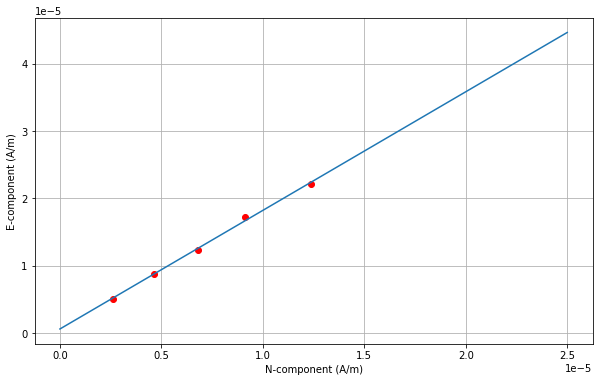

In [4]:
#3(b)
import matplotlib.pyplot as plt
p=np.polyfit(N,E,1)
pL=np.poly1d(p)
xVec = np.linspace(0, 1e-6*25, 100)

P= plt.figure(figsize=(10,6))
plt.xlabel('N-component (A/m)')
plt.ylabel('E-component (A/m)')
plt.plot(N,E,'or', xVec, pL(xVec))
plt.grid()
from scipy.stats import linregress
linregress(N,E)


In [0]:
slope=1.7617174641992976
optD=np.degrees(math.atan(slope)) #optimum declination
print (optD)

60.41954644921205


LinregressResult(slope=0.29097722017906985, intercept=-6.324048551005399e-07, rvalue=0.9983134939730103, pvalue=8.312005219020226e-05, stderr=0.009769159067124606)

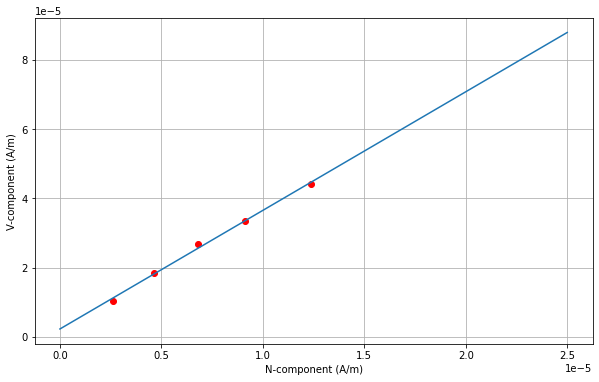

In [5]:
#3(c)
p1 = np.polyfit(N,V,1)
pL1 = np.poly1d(p1)
xVec1 = np.linspace(0, 1e-6*25, 100)

P1= plt.figure(figsize=(10,6))
plt.xlabel('N-component (A/m)')
plt.ylabel('V-component (A/m)')
plt.plot(N,V,'or', xVec1, pL1(xVec1))
plt.grid()
from scipy.stats import linregress
linregress(V,N)

LinregressResult(slope=0.5125517408623419, intercept=-5.004521170790031e-07, rvalue=0.9970063035052188, pvalue=0.00019653974706926398, stderr=0.022949476522117703)

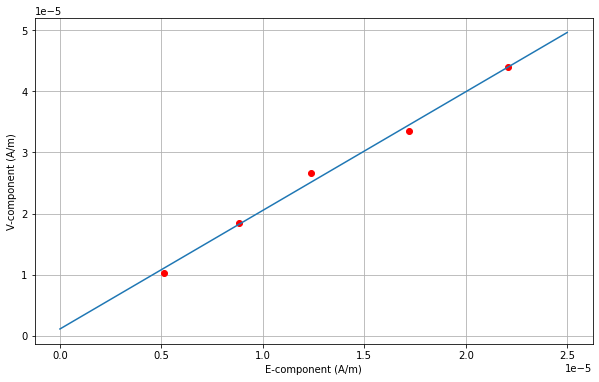

In [7]:
p1 = np.polyfit(E,V,1)
pL1 = np.poly1d(p1)
xVec1 = np.linspace(0, 1e-6*25, 100)

P1= plt.figure(figsize=(10,6))
plt.xlabel('E-component (A/m)')
plt.ylabel('V-component (A/m)')
plt.plot(E,V,'or', xVec1, pL1(xVec1))
plt.grid()
from scipy.stats import linregress
linregress(V,E)

In [27]:
slope1=0.29 #slope of N/V
slope2=0.52 #slope of E/v
optI=np.degrees(math.atan((slope1**2+slope2**2)**-0.5)) #optimum inclination
print (optI)

59.23047256768525


In [0]:
#4(c)
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
import math

In [0]:
phi = np.linspace(0, 2*np.pi, 201) # longitude
theta = np.linspace(0, np.pi, 201) #co-latitude
phi, theta = np.meshgrid(phi, theta)

In [0]:
#define a function that should calculate the Associated Legendre polynomials
# as defined on table 3

def cal_legp(n,m,theta):
 # '''Calculates the Associated Legendre polynomials using (m,n, theta)
    
  # Input parameters
    #m    : order
   # n    : degree
  #  theta: colatitude'''
  if (n ==0 and m==0):
    return 1
  elif (n==1 and m==0):
    return np.cos(theta)
  elif (n==1 and m==1):
    return np.sin(theta)
  elif (n==2 and m==0):
    return ((3/2)*((np.cos(theta))**2)) - 0.5
  elif (n==2 and m==1):
    return (math.sqrt(3))*(np.sin(theta))*(np.cos(theta))
  elif (n==2 and m==2):
    return ((math.sqrt(3))/2) * ((np.sin(theta))**2)
  
  

In [0]:
# Define those Gauss co-efficients given in question 4 of the IGRF 2005 model
g10 = -29557 # nT
g11 = -1672  # nT
g20 = -2341  # nT
g21 = 3047   # nT
g22 = 1657   # nT
h11 = 5080   # nT
h21 = -2595  # nT
h22 = -517   # nT


In [0]:
# Use the geomagnetic potential equation and plug in the values for constants
# Expand the equation for convenience
# Since r = R here, we are going to ignore the (R/r)^n part from the equation
radius = 6371e3
W = radius*((g10*cal_legp(1.0,0.0,theta)) + ((g11*np.cos(phi) + \
    h11*np.sin(phi))*cal_legp(1,1,theta)) + (g20*cal_legp(2,0,theta)) + \
            (((g21*np.cos(phi)) + (h21*np.sin(phi)))*cal_legp(2,1,theta))+ \
            ((g22*np.cos(2*phi))+(h22*np.sin(2*phi)))*cal_legp(2,2,theta)) 

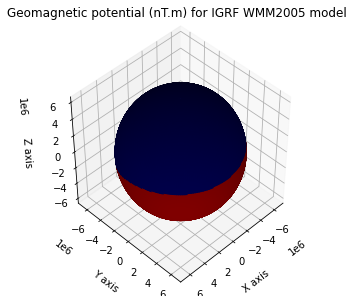

In [36]:
x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(W))
ax.view_init(45, 45)
plt.tight_layout()
plt.title('Geomagnetic potential (nT.m) for IGRF WMM2005 model')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

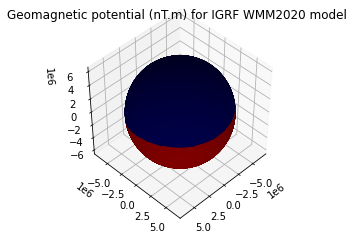

In [42]:
#4(d)
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
import math

phi = np.linspace(0, 2*np.pi, 201) # longitude
theta = np.linspace(0, np.pi, 201) #co-latitude
phi, theta = np.meshgrid(phi, theta)

# define a function that should calculate the Associated Legendre polynomials
# as defined on table 3

def cal_legp(n,m,theta):
  '''Calculates the Associated Legendre polynomials using (m,n, theta)
    
  Input parameters
    m    : order
    n    : degree
    theta: colatitude'''
  if (n ==0 and m==0):
    return 1
  elif (n==1 and m==0):
    return np.cos(theta)
  elif (n==1 and m==1):
    return np.sin(theta)
  elif (n==2 and m==0):
    return ((3/2)*((np.cos(theta))**2)) - 0.5
  elif (n==2 and m==1):
    return (math.sqrt(3))*(np.sin(theta))*(np.cos(theta))
  elif (n==2 and m==2):
    return ((math.sqrt(3))/2) * ((np.sin(theta))**2)

  
# Define those Gauss co-efficients downloaded for the IGRF WMM2020 model
g10 = -29404.5 # nT
g11 = -1450.7  # nT
g20 = -2900  # nT
g21 = 2982   # nT
g22 = 1676.0   # nT
h11 = 4652.9   # nT
h21 = -2991.6  # nT
h22 = -734.8   # nT

radius = 6378e3
W20 = radius*((g10*cal_legp(1.0,0.0,theta)) + ((g11*np.cos(phi) + h11*np.sin(phi))*cal_legp(1,1,theta)) + (g20*cal_legp(2,0,theta)) + (((g21*np.cos(phi)) + (h21*np.sin(phi)))*cal_legp(2,1,theta))+ ((g22*np.cos(2*phi))+(h22*np.sin(2*phi)))*cal_legp(2,2,theta)) 

x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(W20))
ax.view_init(45, 45)
plt.title('Geomagnetic potential (nT.m) for IGRF WMM2020 model')
plt.show()


In [43]:
print (W)

[[-2.03222158e+11 -2.03222158e+11 -2.03222158e+11 ... -2.03222158e+11
  -2.03222158e+11 -2.03222158e+11]
 [-2.02830404e+11 -2.02828789e+11 -2.02827540e+11 ... -2.02834727e+11
  -2.02832384e+11 -2.02830404e+11]
 [-2.02377131e+11 -2.02373988e+11 -2.02371594e+11 ... -2.02385655e+11
  -2.02381021e+11 -2.02377131e+11]
 ...
 [ 1.71941100e+11  1.72001763e+11  1.72063702e+11 ...  1.71823842e+11
   1.71881774e+11  1.71941100e+11]
 [ 1.72682294e+11  1.72712683e+11  1.72743719e+11 ...  1.72623577e+11
   1.72652582e+11  1.72682294e+11]
 [ 1.73393136e+11  1.73393136e+11  1.73393136e+11 ...  1.73393136e+11
   1.73393136e+11  1.73393136e+11]]
